## Imports

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Read Data

In [5]:
df = pd.read_csv("../data/TSPA.csv", sep=";", header=None)
df.columns = ["x", "y", "val"]
df

,x,y,val
0,1355,1796,496
1,2524,387,414
2,2769,430,500
3,3131,1199,1133
4,661,87,903
...,...,...,...
195,189,1151,1145
196,3688,759,727
197,973,984,1637
198,910,1383,1255


## Utils

In [6]:
def plot_nodes_with_lines(nodes, connections=None):
    """
    Plots nodes with optional lines connecting them.

    Parameters:
    nodes: DataFrame of nodes, each with 'x', 'y', and 'val'.
    connections: list of node positions in nodes DataFrame in order of connections
    """
    plt.figure(figsize=(14, 7))

    # Plotting the points
    plt.scatter(df.x, df.y, color='blue')

    # Adding labels above the points
    for i in range(len(nodes)):
        plt.text(df.x[i], df.y[i] + 20, str(df.val[i]), ha='center', fontsize=9, color='black')

    # Drawing lines between specified connections
    if connections:
        for start, end in zip(connections[:-1], connections[1:]):
            plt.plot([df.x[start], df.x[end]], [df.y[start], df.y[end]], color='red')

    plt.xlabel('X')
    plt.ylabel('Y')
    text = 'Nodes with Values' if not connections else 'Nodes with Values and Connections'
    plt.title(text)
    plt.grid(False)
    plt.show()

def get_distance_matrix(df, distance_function):
    """
    Calculates the distance matrix for a set of nodes using the given distance function.

    Parameters:
    nodes: DataFrame of nodes, each with 'x', 'y', and 'val'.
    distance_function: function that takes two points (x1, y1) and (x2, y2) and returns the distance.

    Returns:
    A 2D numpy array representing the distance matrix.
    """
    positions = df[["x", "y"]]
    num_nodes = len(positions)
    distance_matrix = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        for j in range(i, num_nodes):
            dist = round(distance_function(positions.iloc[i], positions.iloc[j]))
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist

    return distance_matrix

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)
    # return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

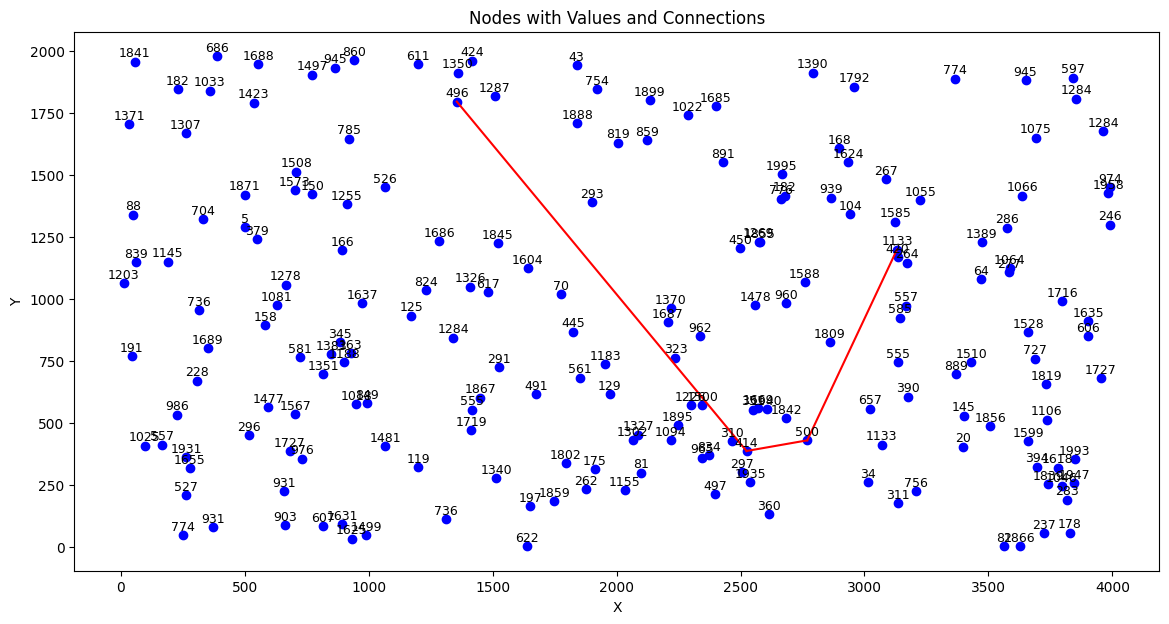

In [7]:
plot_nodes_with_lines(df, [0,1,2,3])

In [8]:
distance_matrix = get_distance_matrix(df, euclidean_distance)

In [9]:
pd.DataFrame(distance_matrix)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,1831.0,1966.0,1874.0,1845.0,1097.0,1658.0,2297.0,2193.0,1364.0,...,1977.0,746.0,1414.0,993.0,1527.0,1333.0,2553.0,897.0,607.0,1100.0
1,1831.0,0.0,249.0,1014.0,1887.0,1985.0,802.0,1872.0,1270.0,1027.0,...,2173.0,2104.0,2213.0,2215.0,1016.0,2457.0,1222.0,1662.0,1897.0,2600.0
2,1966.0,249.0,0.0,850.0,2136.0,2209.0,1050.0,1698.0,1066.0,981.0,...,2421.0,2301.0,2447.0,2426.0,1264.0,2679.0,976.0,1880.0,2089.0,2796.0
3,1874.0,1014.0,850.0,0.0,2709.0,2513.0,1715.0,858.0,344.0,512.0,...,2976.0,2442.0,2809.0,2632.0,1861.0,2942.0,710.0,2169.0,2229.0,2907.0
4,1845.0,1887.0,2136.0,2709.0,0.0,888.0,1091.0,3487.0,3036.0,2396.0,...,288.0,1352.0,780.0,1214.0,874.0,1164.0,3101.0,950.0,1320.0,1632.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1333.0,2457.0,2679.0,2942.0,1164.0,473.0,1834.0,3537.0,3286.0,2486.0,...,1087.0,587.0,384.0,342.0,1587.0,0.0,3521.0,802.0,757.0,523.0
196,2553.0,1222.0,976.0,710.0,3101.0,3068.0,2023.0,1124.0,517.0,1212.0,...,3384.0,3063.0,3338.0,3231.0,2227.0,3521.0,0.0,2724.0,2847.0,3545.0
197,897.0,1662.0,1880.0,2169.0,950.0,345.0,1113.0,2824.0,2513.0,1741.0,...,1085.0,529.0,649.0,563.0,890.0,802.0,2724.0,0.0,404.0,987.0
198,607.0,1897.0,2089.0,2229.0,1320.0,497.0,1462.0,2785.0,2569.0,1752.0,...,1409.0,216.0,807.0,419.0,1260.0,757.0,2847.0,404.0,0.0,708.0
